In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# input dataset

In [3]:
(X_train, y_train), (X_test, y_test) =mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


# Plot one sample of dataset

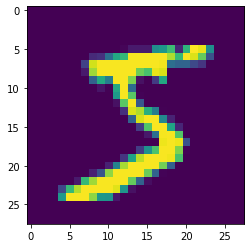

In [4]:
plt.imshow(X_train[0])

# Preprocessing the dataset

In [6]:
X_train=X_train.reshape(X_train.shape[0],784)
X_test=X_test.reshape(X_test.shape[0],784)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

# Setting up the model (DNN with 4 layers)

In [8]:
model=Sequential()
model.add(Dense(256, activation='relu', input_shape=(784, )))
model.add(Dropout(0.4))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

W0919 14:03:18.900462  6184 deprecation_wrapper.py:119] From C:\Users\amyshi\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0919 14:03:18.939853  6184 deprecation_wrapper.py:119] From C:\Users\amyshi\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0919 14:03:18.965121  6184 deprecation_wrapper.py:119] From C:\Users\amyshi\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0919 14:03:18.978490  6184 deprecation_wrapper.py:119] From C:\Users\amyshi\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Pleas

# Model summary

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total para

# Compile the model by specifying the loss function and optimizer

In [10]:
model.compile(loss='categorical_crossentropy', 
              metrics=['accuracy'], 
              optimizer='adam') 

W0919 14:03:51.170679  6184 deprecation_wrapper.py:119] From C:\Users\amyshi\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0919 14:03:51.186308  6184 deprecation_wrapper.py:119] From C:\Users\amyshi\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



# Fit the model

In [11]:
model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2)

W0919 14:04:05.659095  6184 deprecation.py:323] From C:\Users\amyshi\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 3s 66us/step - loss: 1.3850 - acc: 0.4976 - val_loss: 0.6739 - val_acc: 0.7862
Epoch 2/30
48000/48000 [==============================] - 2s 51us/step - loss: 0.6673 - acc: 0.7844 - val_loss: 0.3870 - val_acc: 0.8902
Epoch 3/30
48000/48000 [==============================] - 2s 51us/step - loss: 0.4825 - acc: 0.8542 - val_loss: 0.3022 - val_acc: 0.9108
Epoch 4/30
48000/48000 [==============================] - 2s 51us/step - loss: 0.4010 - acc: 0.8835 - val_loss: 0.2618 - val_acc: 0.9220
Epoch 5/30
48000/48000 [==============================] - 2s 50us/step - loss: 0.3512 - acc: 0.8985 - val_loss: 0.2248 - val_acc: 0.9334
Epoch 6/30
48000/48000 [==============================] - 3s 65us/step - loss: 0.3098 - acc: 0.9111 - val_loss: 0.1987 - val_acc: 0.9392
Epoch 7/30
48000/48000 [==============================] - 3s 53us/step - loss: 0.2790 - acc: 0.9203 - val_loss: 0.1850 - val_acc

# Find the model fitting history keywords

In [ ]:
print(model.history.history.keys())

# Plot the accuracy vs. epoch

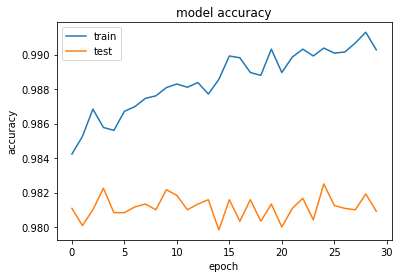

In [66]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# Evaluate the model accuracy

In [76]:
model.evaluate(X_test, y_test, verbose=0)

[0.08440149382256208, 0.9834]

# Model prediction

In [78]:
pred=model.predict_classes(X_test)

In [79]:
print(pred[1:10])

[2 1 0 4 1 4 9 5 9]
